In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow. keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras import layers

In [3]:
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
import pathlib
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)

In [5]:
print(flowers_data)

C:\Users\Manas\.keras\datasets\flower_photos


In [6]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))

C:\Users\Manas\.keras\datasets\flower_photos\sunflowers\1022552002_2b93faf9e7_n.jpg


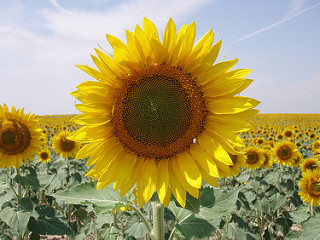

In [7]:
import PIL
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[1]))

In [8]:
all_roses = list(flowers_data.glob('roses/*'))

C:\Users\Manas\.keras\datasets\flower_photos\roses\102501987_3cdb8e5394_n.jpg


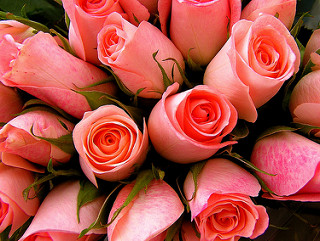

In [9]:
import PIL
print(all_roses[1])
PIL.Image.open(str(all_roses[8]))

In [10]:
height,width=180,180

In [11]:
training_batch_size=32

In [12]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="training",
seed=123,
image_size=(height,width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [14]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
flowers_data,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(height, width),
batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Initialize Sequential model
dnn_model = Sequential()

# Load ResNet50 model without the top classification layers
imported_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze the layers in the imported ResNet50 model
for layer in imported_model.layers:
    layer.trainable = False

# Add the imported model to the Sequential model, specifying input shape explicitly
dnn_model.add(tf.keras.layers.InputLayer(input_shape=(180, 180, 3)))
dnn_model.add(imported_model)

# Add Flatten and Dense layers to adapt for your specific classification task
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes in your dataset

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
dnn_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [39]:
from tensorflow.keras.optimizers import Adam

# Use learning_rate instead of lr
dnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [36]:
history = dnn_model.fit(
train_set,
validation_data=validation_set,
epochs=10
)

Epoch 1/10


87/92 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6736 - loss: 1.1401

KeyboardInterrupt: 